In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
plt.rcParams['figure.figsize'] = 16, 10

In [2]:
%run ../code/makedbs.py

In [42]:
ws = get_db('walkscore').sort_values(by = ['snapped_lon', 'snapped_lat'])
print ws.shape
ws.head()

(5032, 7)


,snapped_lat,snapped_lon,walkscore,description,updated,searched_lat,searched_lon
0,37.7190,-122.5185,1,Car-Dependent,2013-08-10 17:19:49.723670,37.719347,-122.518079
1,37.7205,-122.5185,0,Car-Dependent,2015-06-16 02:11:34.261700,37.720717,-122.518079
2,37.7220,-122.5185,2,Car-Dependent,2013-08-10 17:20:27.329400,37.722088,-122.518079
3,37.7235,-122.5185,0,Car-Dependent,2014-09-05 10:53:05.520620,37.723458,-122.518079
4,37.7250,-122.5185,0,Car-Dependent,2015-06-16 02:11:33.920510,37.724829,-122.518079


In [43]:
x = ws.snapped_lon.unique()
y = ws.snapped_lat.unique()
X, Y = np.meshgrid(x, y)
print X.shape, Y.shape

(68, 74) (68, 74)


In [44]:
print len(x), len(y)

74 68


In [45]:
z = ws.walkscore.reshape(68, 74, order='F')

<matplotlib.colorbar.Colorbar instance at 0x106dbffc8>

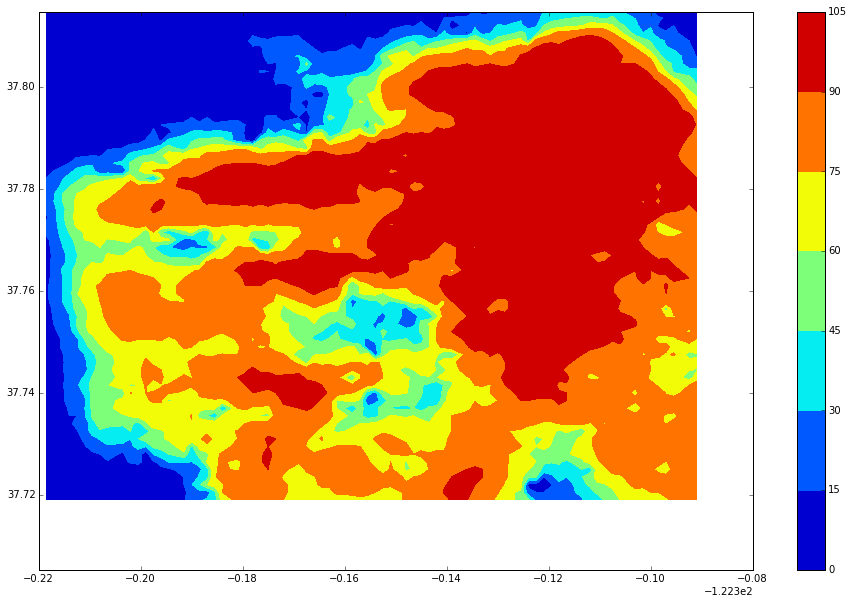

In [46]:
plt.contourf(x, y, z)
plt.axis('equal')
plt.colorbar()

In [40]:
print min(x), max(x), min(y), max(y)

-122.5185 -122.391 37.719 37.8195
